In [59]:
import pnet_loader
import util
import torch
import seaborn as sns
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of CustomizedLinear failed: Traceback (most recent call last):
  File "/Users/marc/opt/anaconda3/envs/pnet/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/Users/marc/opt/anaconda3/envs/pnet/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 484, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/marc/opt/anaconda3/envs/pnet/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 381, in update_generic
    update(a, b)
  File "/Users/marc/opt/anaconda3/envs/pnet/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 333, in update_class
    if update_generic(old_obj, new_obj):
  File "/Users/marc/opt/anaconda3/envs/pnet/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 381, in update_generic
    update(a, b)
  File "/Users/marc/opt/anaconda3/envs/pnet/lib/python3.10/site-packages/IPython/extensions/autoreload

In [60]:
prostate_mutations = pd.read_csv('../../data/pnet_database/prostate/processed/P1000_final_analysis_set_cross_important_only.csv')
prostate_mutations.set_index('Tumor_Sample_Barcode', inplace=True)

prostate_cnv = pd.read_csv('../../data/pnet_database/prostate/processed/P1000_data_CNA_paper.csv')
prostate_cnv.rename(columns={"Unnamed: 0": "Tumor_Sample_Barcode"}, inplace=True)
prostate_cnv.set_index('Tumor_Sample_Barcode', inplace=True)

prostate_response = pd.read_csv('../../data/pnet_database/prostate/processed/response_paper.csv')
prostate_response.rename(columns={'id': "Tumor_Sample_Barcode"}, inplace=True)
prostate_response.set_index('Tumor_Sample_Barcode', inplace=True)

prostate_genes = pd.read_csv('../../data/pnet_database/genes/tcga_prostate_expressed_genes_and_cancer_genes.csv')
prostate_genes = list(set(prostate_genes['genes']).intersection(set(prostate_mutations.columns)).intersection(set(prostate_cnv.columns)))

prostate_cnv = prostate_cnv[prostate_genes].copy()
prostate_mutations = prostate_mutations[prostate_genes].copy()

prostate_genes = util.select_highly_variable_genes(prostate_mutations)
prostate_genes = prostate_genes['level_1']
prostate_mutations = prostate_mutations[list(set(prostate_mutations.columns).intersection(prostate_genes))].copy()
prostate_cnv = prostate_cnv[list(set(prostate_cnv.columns).intersection(prostate_genes))].copy()

## Generate pnet_loader

In [61]:
genetic_data = {'mut': prostate_mutations, 'cnv': prostate_cnv}

In [62]:
import Pnet

In [63]:
model, train_scores, test_scores, train_dataset, test_dataset = Pnet.run(genetic_data,
                                                                         prostate_response,
                                                                         verbose=True,
                                                                         early_stopping=False)

Given 2 Input modalities
Found 1011 overlapping indicies
Initializing Train Dataset
Found 700 overlapping genes
generated input DataFrame of size (708, 1400)
Initializing Test Dataset
Found 700 overlapping genes
generated input DataFrame of size (303, 1400)
Found 700 overlapping genes
Epoch 1 of 300
Train scores: (0.7154091569663441, 0.3361581920903955)
Test scores: (0.7121356800444448, 0.31353135313531355)
Epoch 2 of 300
Train scores: (0.704807087526483, 0.3361581920903955)
Test scores: (0.7078974884335357, 0.31353135313531355)
Epoch 3 of 300
Train scores: (0.6963709320052195, 0.3700564971751412)
Test scores: (0.7029043392773116, 0.31353135313531355)
Epoch 4 of 300
Train scores: (0.6873962323544389, 0.6511299435028248)
Test scores: (0.6972497367229399, 0.31353135313531355)
Epoch 5 of 300
Train scores: (0.6809202661622042, 0.7189265536723164)
Test scores: (0.6901958704781611, 0.6864686468646864)
Epoch 6 of 300
Train scores: (0.6732072220683771, 0.6949152542372882)
Test scores: (0.68032

Epoch 61 of 300
Train scores: (0.43320644676348585, 0.8319209039548022)
Test scores: (0.46078245710618426, 0.8217821782178217)
exceeded delta
Epoch 62 of 300
Train scores: (0.4231512442146991, 0.8290960451977402)
Test scores: (0.4552431012144183, 0.8283828382838284)
exceeded delta
Epoch 63 of 300
Train scores: (0.4287591876283204, 0.8333333333333334)
Test scores: (0.49501325273671165, 0.8250825082508251)
exceeded delta
Epoch 64 of 300
Train scores: (0.41892925039523066, 0.8361581920903954)
Test scores: (0.4200204402306686, 0.834983498349835)
Epoch 65 of 300
Train scores: (0.41517886334219894, 0.8418079096045198)
Test scores: (0.4126914877309264, 0.834983498349835)
Epoch 66 of 300
Train scores: (0.4176028333814804, 0.8305084745762712)
Test scores: (0.44445837291553864, 0.8151815181518152)
exceeded delta
Epoch 67 of 300
Train scores: (0.41825034860837257, 0.8403954802259888)
Test scores: (0.4501673506431454, 0.8085808580858086)
exceeded delta
Epoch 68 of 300
Train scores: (0.410206801137

Epoch 121 of 300
Train scores: (0.34327566051213754, 0.8714689265536724)
Test scores: (0.45220010587484527, 0.8118811881188119)
exceeded delta
Epoch 122 of 300
Train scores: (0.3470227454004988, 0.8686440677966102)
Test scores: (0.4871204930170141, 0.7920792079207921)
exceeded delta
Epoch 123 of 300
Train scores: (0.3342938989737613, 0.8771186440677966)
Test scores: (0.4434689436808671, 0.8184818481848185)
exceeded delta
Epoch 124 of 300
Train scores: (0.35250139337475017, 0.8531073446327684)
Test scores: (0.40350165540235666, 0.834983498349835)
exceeded delta
Epoch 125 of 300
Train scores: (0.3476167659638292, 0.865819209039548)
Test scores: (0.3684662041491014, 0.8514851485148515)
exceeded delta
Epoch 126 of 300
Train scores: (0.35481973438613157, 0.865819209039548)
Test scores: (0.369500994288882, 0.8415841584158416)
exceeded delta
Epoch 127 of 300
Train scores: (0.3532353026718743, 0.8587570621468926)
Test scores: (0.3688259439499858, 0.8481848184818482)
exceeded delta
Epoch 128 of

Epoch 180 of 300
Train scores: (0.2929134388259575, 0.8983050847457628)
Test scores: (0.3470640025123118, 0.8679867986798679)
exceeded delta
Epoch 181 of 300
Train scores: (0.3155858998244765, 0.8785310734463276)
Test scores: (0.4037303735714148, 0.8382838283828383)
exceeded delta
Epoch 182 of 300
Train scores: (0.31603848429049475, 0.8742937853107344)
Test scores: (0.4658080311891663, 0.7953795379537953)
exceeded delta
Epoch 183 of 300
Train scores: (0.31725456805552466, 0.8785310734463276)
Test scores: (0.527479618689408, 0.7821782178217822)
exceeded delta
Epoch 184 of 300
Train scores: (0.3172807231292886, 0.8742937853107344)
Test scores: (0.38809351401753944, 0.8547854785478548)
exceeded delta
Epoch 185 of 300
Train scores: (0.31874328582300304, 0.8757062146892656)
Test scores: (0.38308428144297585, 0.8514851485148515)
exceeded delta
Epoch 186 of 300
Train scores: (0.3111586917591634, 0.8728813559322034)
Test scores: (0.4292792392642585, 0.801980198019802)
exceeded delta
Epoch 187 

Epoch 239 of 300
Train scores: (0.28977553487497537, 0.902542372881356)
Test scores: (0.38515588552644936, 0.834983498349835)
exceeded delta
Epoch 240 of 300
Train scores: (0.2799882579826366, 0.8968926553672316)
Test scores: (0.39629404300903726, 0.8382838283828383)
exceeded delta
Epoch 241 of 300
Train scores: (0.2932311116302081, 0.8940677966101694)
Test scores: (0.4272112641790912, 0.8250825082508251)
exceeded delta
Epoch 242 of 300
Train scores: (0.29493692365743346, 0.8912429378531074)
Test scores: (0.8389036663294626, 0.5445544554455446)
exceeded delta
Epoch 243 of 300
Train scores: (0.2816418355467629, 0.9067796610169492)
Test scores: (0.7943364133929262, 0.5775577557755776)
exceeded delta
Epoch 244 of 300
Train scores: (0.27244342080617356, 0.9124293785310734)
Test scores: (0.4562395114709835, 0.7986798679867987)
exceeded delta
Epoch 245 of 300
Train scores: (0.2754700073582978, 0.8884180790960452)
Test scores: (0.3702719723037367, 0.8415841584158416)
exceeded delta
Epoch 246 

Epoch 298 of 300
Train scores: (0.2525728698504173, 0.922316384180791)
Test scores: (0.9026379223310514, 0.5346534653465347)
exceeded delta
Epoch 299 of 300
Train scores: (0.2620227535565694, 0.9110169491525424)
Test scores: (0.5115185791116343, 0.801980198019802)
exceeded delta
Epoch 300 of 300
Train scores: (0.2593307232452651, 0.9138418079096046)
Test scores: (0.7476197170345696, 0.6435643564356436)
exceeded delta


In [64]:
x_train = train_dataset.input_df.values
additional_train = train_dataset.additional_data.values
y_train = train_dataset.target.values.reshape(-1)
x_test = test_dataset.input_df.values
additional_test = test_dataset.additional_data.values
y_test = test_dataset.target.values.reshape(-1)

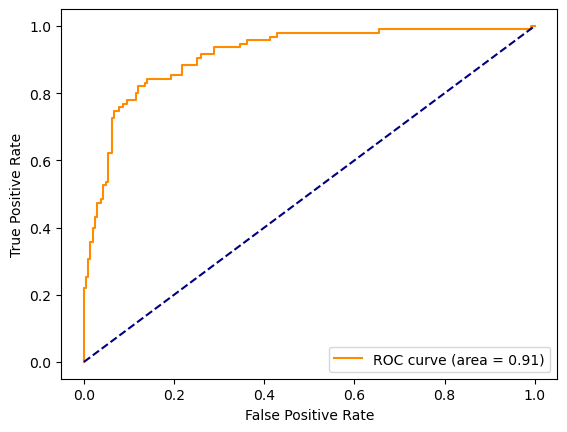

In [65]:
pred = model(torch.tensor(x_test, dtype=torch.float),
                          torch.tensor(additional_test, dtype=torch.float)
            )
y_pred_proba = pred.detach().numpy().squeeze()
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
test_auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr, color="darkorange", label="ROC curve (area = %0.2f)" % test_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.legend(loc="lower right")
plt.savefig('PNET_prostate_val_ROC_curve.pdf')
plt.show()

In [66]:
gene_importances, additional_importances = model.deepLIFT(test_dataset)

/Users/marc/opt/anaconda3/envs/pnet/lib/python3.10/site-packages/captum/attr/_core/deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


In [67]:
gene_imp_by_target = gene_importances.join(test_dataset.target).groupby('response').mean().T
gene_imp_by_target['diff'] = gene_imp_by_target[0] - gene_imp_by_target[1]

In [68]:
gene_imp_by_target[abs(gene_imp_by_target['diff']) > 0].nlargest(10, 'diff')

response,0,1,diff
CAPN1_cnv,0.005280,-0.004887,0.010167
PTEN_cnv,0.026148,0.016268,0.009880
TSC2_cnv,0.009099,0.001389,0.007710
AXIN1_cnv,0.008263,0.003457,0.004806
ATG9A_cnv,0.000970,-0.003023,0.003993
HSPG2_cnv,0.004866,0.000956,0.003910
RNF216_cnv,0.009824,0.005976,0.003848
RELA_cnv,0.003983,0.000354,0.003629
PABPC1_cnv,0.007784,0.004853,0.002931
CACNB2_cnv,0.004240,0.001394,0.002846


In [69]:
gene_importances.mean().nlargest(20)

PTEN_cnv      0.023050
APC_cnv       0.008939
RNF216_cnv    0.008617
PRKDC_cnv     0.008205
TP53          0.008077
TAF2_cnv      0.007738
PABPC1_cnv    0.006865
AXIN1_cnv     0.006756
AR_cnv        0.006717
TSC2_cnv      0.006682
CUL1_cnv      0.005403
PIK3CA_cnv    0.004455
MCM3_cnv      0.004396
LMNA_cnv      0.004286
PKP1_cnv      0.004271
NFKB1_cnv     0.004243
RPL10A_cnv    0.003842
EXOC3_cnv     0.003794
AR            0.003660
HSPG2_cnv     0.003640
dtype: float32

In [70]:
pathway_importances = model.layerwise_importance(test_dataset)

In [71]:
pathway_importances[-1].nlargest(10, 1)

response,0,1,diff
Cellular responses to external stimuli,0.000915,0.039004,0.038090
Metabolism of proteins,0.012012,0.022608,0.010596
Developmental Biology,0.010936,0.020486,0.009550
Signal Transduction,0.008149,0.018378,0.010229
DNA Repair,0.011632,0.014196,0.002564
Extracellular matrix organization,0.006617,0.012103,0.005486
Sensory Perception,0.000937,0.010962,0.010025
Hemostasis,0.008317,0.010942,0.002625
Circadian Clock,0.004463,0.005404,0.000941
Reproduction,0.001725,0.005254,0.003529


In [72]:
pathway_importances[-2].nlargest(10, 1)

response,0,1,diff
Cellular responses to stress,0.001299,0.052735,0.051436
Post-translational protein modification,0.006333,0.013758,0.007425
DNA Double-Strand Break Repair,0.012975,0.013450,0.000475
Keratinization,0.004650,0.012441,0.007792
Signaling by WNT,0.005216,0.008919,0.003703
Transcriptional regulation of white adipocyte differentiation,0.004768,0.008667,0.003899
Sensory processing of sound,0.004133,0.006763,0.002630
Membrane Trafficking,0.003062,0.006256,0.003194
Translation,0.005887,0.006060,0.000173
DNA Replication Pre-Initiation,0.004728,0.005986,0.001259


In [73]:
pathway_importances[-3].nlargest(10, 1)

response,0,1,diff
HSP90 chaperone cycle for steroid hormone receptors (SHR),0.002474,0.108070,0.105596
Formation of the cornified envelope,0.008502,0.023476,0.014974
Generic Transcription Pathway,0.004554,0.020308,0.015753
Synthesis of IP3 and IP4 in the cytosol,0.008836,0.013263,0.004426
Nonhomologous End-Joining (NHEJ),0.013090,0.013193,0.000102
TCF dependent signaling in response to WNT,0.006543,0.012161,0.005618
Deubiquitination,0.004175,0.009546,0.005370
Sensory processing of sound by inner hair cells of the cochlea,0.006128,0.008335,0.002207
PIP3 activates AKT signaling,0.005060,0.008203,0.003144
Meiotic synapsis,0.002122,0.008032,0.005910


In [74]:
pathway_importances[-4].nlargest(10, 1)

response,0,1,diff
SUMO E3 ligases SUMOylate target proteins,0.000713,0.030479,0.029766
Nuclear Receptor transcription pathway,0.000429,0.026512,0.026083
Ub-specific processing proteases,0.007281,0.026179,0.018898
Negative regulation of the PI3K/AKT network,0.007124,0.012737,0.005613
Estrogen-dependent gene expression,0.005299,0.012335,0.007036
PTEN Loss of Function in Cancer,0.004559,0.009883,0.005324
Ovarian tumor domain proteases,0.003851,0.008306,0.004454
Disassembly of the destruction complex and recruitment of AXIN to the membrane,0.002925,0.007686,0.004761
Deactivation of the beta-catenin transactivating complex,0.003794,0.007482,0.003688
Downstream TCR signaling,0.007424,0.007151,0.000273


In [75]:
pathway_importances[-5].nlargest(10, 1)

IndexError: list index out of range

In [ ]:
pathway_importances[-6].nlargest(10, 1)

In [ ]:
pathway_importances[-7].nlargest(10, 1)

In [ ]:
pathway_importances[-8].nlargest(10, 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()
clf.fit(train_dataset.input_df.values, train_dataset.target.values.reshape(-1))

In [ ]:
test_acc = sum(clf.predict(test_dataset.input_df.values) == test_dataset.target.values.reshape(-1))/len(test_dataset)
test_acc

In [ ]:
pd.DataFrame(clf.feature_importances_, index=test_dataset.input_df.columns).nlargest(10, 0)